**Interactive Recursive Fractals Notebook**

November, 2019

I saw this series https://twitter.com/FogleBird/status/1198436843223695361 from @FogleBird and
wanted to recreate it in Jupyter Notebook.

To get here, I needed to stand on the shoulders of these websites.

* https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6
* https://nedbatchelder.com/blog/201901/drawing_cairo_svg_in_a_jupyter_notebook.html

First, I show the code as closely as possible from the tweet.

In [1]:
import cairo
import math
import IPython.display
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from io import BytesIO

In [2]:
def draw(cr, d, x, y, s, w, a):
    nx = x + math.cos(math.radians(a)) * s
    ny = y + math.sin(math.radians(a)) * s
    cr.move_to(x,y)
    cr.line_to(nx,ny)
    cr.set_line_width(w)
    cr.stroke()
    if d == 0:
        return
    draw(cr, d-1, nx, ny, s/1.456, w/1.333, a + 90)
    draw(cr, d-1, nx, ny, s/1.456, w/1.333, a - 90)

def draw_svg(size,levels):
    svgio = BytesIO()
    with cairo.SVGSurface(svgio, size, size) as surface:
        cr = cairo.Context(surface)
        cr.set_source_rgb(1,1,1)
        cr.paint()
        cr.set_source_rgb(0,0,0)
        cr.scale(size,size)
        draw(cr, levels, 0.5, 0.5, 0.25, 0.015, 0)
        draw(cr, levels, 0.5, 0.5, 0.25, 0.015, 180)
    return IPython.display.SVG(data=svgio.getvalue())

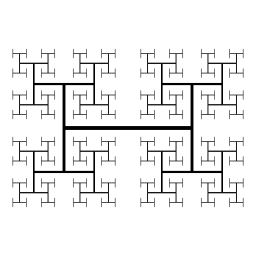

In [3]:
draw_svg(256,7)

Nice!  Next, I wanted to parameterize and explore it interactively.

In [4]:
def draw1(cr, d, x, y, s, w, a, a0, r0, r1):
    nx = x + math.cos(math.radians(a)) * s
    ny = y + math.sin(math.radians(a)) * s
    cr.move_to(x,y)
    cr.line_to(nx,ny)
    cr.set_line_width(w)
    cr.stroke()
    if d == 0:
        return
    draw1(cr, d-1, nx, ny, s/r0, w/r1, a + a0/2, a0, r0, r1)
    draw1(cr, d-1, nx, ny, s/r0, w/r1, a - a0/2, a0, r0, r1)

def draw_svg1(size,levels,length,rotation,angle,r0,r1):
    svgio = BytesIO()
    with cairo.SVGSurface(svgio, size, size) as surface:
        cr = cairo.Context(surface)
        cr.set_source_rgb(0.96,0.95,0.90)
        cr.paint()
        cr.set_source_rgb(0,0,0)
        cr.scale(size,size)
        draw1(cr, levels, 0.5, 0.5, length, 0.015, rotation+angle/2, angle, r0, r1)
        draw1(cr, levels, 0.5, 0.5, length, 0.015, rotation-angle/2, angle, r0, r1)
    return IPython.display.SVG(data=svgio.getvalue())

If you set num_levels=7, init_length=0.25, rotation=90, split_angle=180, length_div=1.45 and width_div=1.25 you can reproduce the original.  Explore & have fun!

In [5]:
@interact
def show_drawing(num_levels=(0,12,1),
                 init_length=(0.05,0.5,0.01),
                 rotation=(0,360,1),
                 split_angle=(0,180,1),
                 length_div=(1.0,4.0,0.01),
                 width_div=(1.0,2.0,0.01)):
    return draw_svg1(480,num_levels,init_length,rotation,split_angle,length_div,width_div)

interactive(children=(IntSlider(value=6, description='num_levels', max=12), FloatSlider(value=0.27, descriptio…